<a href="https://colab.research.google.com/github/SaraElwatany/PCA-Implementation-from-Scratch/blob/main/Assignment_1_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Requirement 1**

In [ ]:
import random
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
# A function that generates normally distributed data
def generate_data(MU=2, VAR=10, SAMPLES=100):

  SEED = 42       # Initialize a seed for the reproducibilty of x & y generation
  random_gen = random.Random(x= SEED)     # Random generator object, will be used later for the generation of uniformaly distributed dataset

  # Generate lists for x & y
  x = [random_gen.normalvariate(mu=MU, sigma=sqrt(VAR)) for sample in range(0, SAMPLES)]
  y = [random_gen.normalvariate(mu=MU, sigma=sqrt(VAR)) for sample in range(0, SAMPLES)]

  print(f'X list with length of {len(x)}:  ', x)
  print(f'Y list with length of {len(y)}:  ', y)

  return x, y # Return the normally distributed data/variables/features in the form of x & y separate lists

In [ ]:
# A function that Spheres/Whitens the normally distributed data
def sphere_dataset(x, y, cov_mat):

  # Combine the features into one 2d array
  dataset = np.stack((x, y), axis=1)
  print('Dataset Shape: ', dataset.shape)

  # Center the dataset (By subtracting the mean of data)
  centered_dataset = dataset - np.mean(dataset, axis=0)

  # Transpose the dataset
  centered_dataset = centered_dataset.T

  # Get Eigenvalues & Eigenvectors from the covariance matrix
  eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
  print('Eigenvalues: ', eigen_values)
  print('Eigenvectors:\n', eigen_vectors)

  # Get the Diagonal Matrix from the Eigenvalues
  diagonal_mat = np.diag(1/(eigen_values**0.5))
  print('Diagonal Matrix: \n', diagonal_mat)

  # Whiten/Sphere the dataset
  whitened_data = np.dot(np.dot(diagonal_mat, eigen_vectors.T), centered_dataset)
  print('Shape of Whitened Data: ', whitened_data.shape)
  #print('Whitened Data: ', whitened_data)

  return whitened_data  # Return the Sphered/Whitened data/variables/features matrix

In [ ]:
# A function that verifies the mean & covariance matrix of the Sphered/Whitened data
def verify(whitened_data):

  # Get the Mean & Covariance Matrix of the sphered/whitened data & round to 7 decimal points for clarity
  whitened_mean = np.round(np.mean(whitened_data, axis=1), decimals=7)
  # Calculate sphered/whitened covariance matrix
  N = whitened_data.shape[1]
  whitened_cov_mat = (1 / (N-1)) *np.round(np.dot(whitened_data, whitened_data.T), decimals=7)

  # Print the mean & the covariance matrix of the sphered data
  print('Whitened Mean: ', whitened_mean)
  print('Whitened Covariance Matrix: \n', whitened_cov_mat)

In [ ]:
# A function that plots the original & the Sphered/Whitened data in seperate plots
def plot_seperate_plots(x, y, whitened_dataset):

  # Create a figure to plot our data
  fig = plt.figure(figsize=(10,5))

  # Plot the original (unsphered) data
  plt.subplot(1,2,1)
  plt.scatter(x, y, label='Before Sphering', color = 'blue')
  plt.xlabel('First Feature')
  plt.ylabel('Second Feature')
  plt.legend()

  # Plot the sphered data
  plt.subplot(1,2,2)
  plt.scatter(whitened_dataset[0], whitened_dataset[1], label='After Sphering', color = 'red')
  plt.xlabel('First Feature')
  plt.ylabel('Second Feature')
  plt.legend()

  # Show both plots
  plt.show()

In [ ]:
# A function that plots the original & the Sphered/Whitened data in the same plot
def plot_in_one_plot(x, y, whitened_dataset):

  # Create a figure to plot our data
  fig = plt.figure(figsize=(10,10))

  # Set a title for our plot
  plt.title('Before & After Plot')

  # plot the original data
  plt.scatter(x, y, label='Before Sphering', marker='*', color = 'blue')
  # Plot the sphered data
  plt.scatter(whitened_dataset[0], whitened_dataset[1], label='After Sphering', marker='+', color = 'red')

  # Set the X & Y Labels of the plot
  plt.xlabel('First Feature')
  plt.ylabel('Second Feature')

  # Display the legend
  plt.legend()

  # Show the plot
  plt.show()

In [ ]:
# Get the Normally distributed data
X, Y = generate_data(SAMPLES=100)
# Initialize the Covariance Matrix
cov_mat = np.array([[10, 5],
                    [5, 10]])
# Get the sphered dataset
sphered_dataset = sphere_dataset(X, Y, cov_mat)

X list with length of 100:   [2.7757900098336106, 0.42883982115363084, 5.967981518076595, 1.5634189101046212, -1.0858148403178682, 3.786845679183269, -1.6924177422413837, 7.4961191081588465, 0.9738117941726872, 5.738844070616454, 6.757184293480966, 8.164850936795862, 9.310473522143187, 0.5290005516527381, 6.6844158416569455, 6.642756188003952, 3.163095249191487, -0.07728692329562836, -0.9713125655385113, -0.9978922329677111, 3.1588822874038014, 1.10908122678762, 4.054622640259003, -4.586346103131643, -0.9426301141810223, 2.9795970341177025, 0.6327754834244881, 4.979307045174385, 3.3952604329127096, 6.1558127480668805, 0.30692085891412213, 2.451565700991999, 6.49099476009461, 1.300929587490744, -3.6841263323911235, 4.742148691998784, -1.8291157740300834, 4.128965592903102, -1.523211578310927, -1.728220539849516, -3.4358078307788897, 4.768072970896558, 2.003871255869499, -1.028473802496217, 2.6978140822020427, 5.091727598381123, 5.218468091937284, 0.8915624876282389, -2.3731089841265183,

In [ ]:
# Verify the mean & covariance matrix of the shpered data
verify(sphered_dataset)

Whitened Mean:  [ 0. -0.]
Whitened Covariance Matrix: 
 [[0.76786325 0.0636052 ]
 [0.0636052  1.89042408]]


### **Comments**

By looking at the Covariance Matrix of the sphered data we can see that the diagonal elements are close to 1 (indicating a strong relationship) unlike the off diagonal elements, which are very close to zero, indicating the weak relationship between the different features/variables.

The above results indicates that we have succeeded in our data shpering/whitening goal, where the aim was to remove/reduce any correlation between the used features and center the dataset around the mean of zero for a better model performance & inference.

<ipython-input-113-af2c172587d6>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


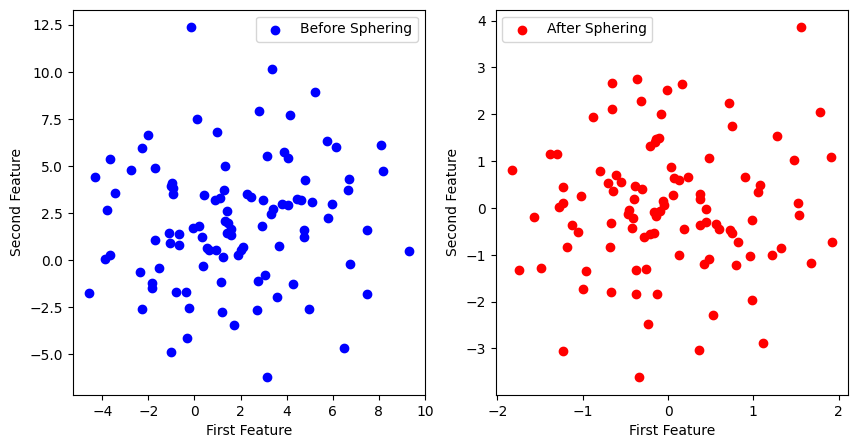

In [ ]:
# Plot the before & after dataset in seperate plots
plot_seperate_plots(X, Y, sphered_dataset)

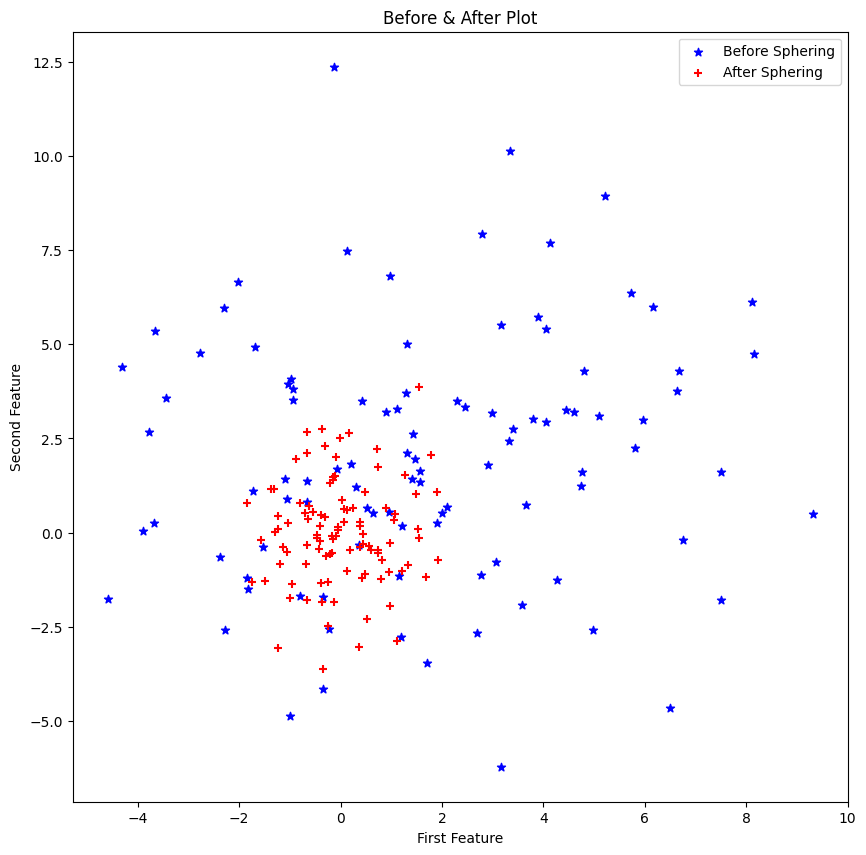

In [ ]:
# Plot the before & after dataset in one plot
plot_in_one_plot(X, Y, sphered_dataset)

### **Comments**

By looking at the above plot we can see that the sphered data is centered around zero.

Also it seems that the sphered data is harder to explain using an equation than the original unsphered data (hardly any correlation between features can now be found), as the data is more spread.

Overall we can say that our data sphering was successful and we managed to limit/reduce the correlation between the used features/data leading to a better model performance.

# **Requirement 2**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
# Load the Iris Dataset
dataset = load_iris()
#print(dataset)

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
targets_encoded = dataset.target_names

In [ ]:
#dataset.data

In [ ]:
#dataset.target

In [ ]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# Get the X/Variables/Features & Y/Target from the Iris Dataset
X , Y = dataset.data, dataset.target

In [ ]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# A function that returns the Eigenvectors & Eigenvalues sorted desindingly
def sort_eigens(eigen_values, eigen_vectors):

  # Get the indicies of the eigenvalues from the original unsorted vector after sorting it descindingly
  idx = eigen_values.argsort()[::-1]

  # Sort Eigenvalues & Eigenvectors Descendingly
  sorted_values = eigen_values[idx]
  sorted_vectors = eigen_vectors[:,idx]

  return sorted_vectors, sorted_values  # Return Sorted Eigenvectors & Eigenvalues

In [ ]:
# A function that performs PCA using the Covariance Matrix on the Iris Dataset
def perform_pca(x, y):

  # Normalize the dataset
  X_normalized = x - np.mean(x, axis=0)

  # Transpose the dataset
  print('Shape of features Before Transpose: ', X_normalized.shape)
  X_normalized = X_normalized.T
  print('Shape of features After Transpose: ', X_normalized.shape)

  # Get Covariance Matrix
  cov_mat = np.cov(X_normalized)
  print('Shape of Covariance Matrix: ', cov_mat.shape)
  print('Covariance Matrix: \n', cov_mat)

  # Get Eigenvalues & Eigenvectors From Covariance Matrix
  eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
  print('Eigenvalues: ', eigenvalues)
  print('Eigenvectors: \n', eigenvectors)

  # Sorting the Eigenvalues & Eigenvectors Descendingly
  sorted_vectors, sorted_values = sort_eigens(eigenvalues, eigenvectors)


  # Get Principal Components
  z = np.dot(X_normalized.T, sorted_vectors)
  #print(f'Principal Components of shape {z.shape} : \n', z)

  return sorted_vectors, sorted_values, z    # Return the Eigenvectors, Eigenvalues & Principal Components respectively

In [ ]:
# A function that verifies the orthonormality of Eigenvectors
def verify_orthonormality(eigen_vectors):

  # Verify condition 1: Each eigenvector should have unit length
  flag_unit_length = 1
  for vec in range(0, eigen_vectors.shape[0]):
    flag_unit_length = np.round(np.dot(eigen_vectors[:,vec], eigen_vectors[:,vec].T), decimals=3)
    print(f'EigenVector {vec+1}: ', flag_unit_length)   # Prints the magnitude of each eigenvector

  print('*'*30)

  # Verify condition 2: Each pair of eigenvectors should be orthogonal
  flag_normal = 0
  for vec_1 in range(0, eigen_vectors.shape[0]):
    for vec_2 in range(0, eigen_vectors.shape[0]):
      if vec_1 == vec_2:
        pass
      else:
        flag_normal = np.round(np.dot(eigen_vectors[:, vec_1], eigen_vectors[:, vec_2].T), decimals=3)
        print(f'EigenVector {vec_1+1} & EigenVector {vec_2+1}: ', flag_normal)    # Prints the condition of orthogonality of each 2 eigenvectors (0 represents orthogonal)

  return bool(flag_unit_length), not bool(flag_normal)    # Return the unit length flag & the orthogonality flag

In [ ]:
# A function that plots all of the principal components in one figure
def plot_all_components(x, y, z, targets=targets_encoded):

  # Create a figure and divide it into 16 subplots
  fig, axs = plt.subplots(4, 4, figsize=(15, 15))

  # Get the number of Principal Components
  n_components = z.shape[1]
  #plot_pos = 1

  # Plot the results
  for component_1 in range(0, n_components):
    for component_2 in range(0, n_components):
      # For each class/target Plot it with a unique color & get its label from the 'targets_encoded' list defined in the cells above
      for target in np.unique(y):
              axs[component_1, component_2].scatter(z[y == target, component_1], z[y == target, component_2], label=targets[target])
      axs[component_1, component_2].set_xlabel(f'Principal Component {component_1+1}')
      axs[component_1, component_2].set_ylabel(f'Principal Component {component_2+1}')
      axs[component_1, component_2].legend()
      #plt.subplot(4,4,plot_pos)
      #plt.scatter(z[: , component_1], z[: , component_2], c=Y, cmap='viridis', edgecolor='k')
      #plt.xlabel(f'Principal Component {component_1+1}')
      #plt.ylabel(f'Principal Component {component_2+1}')
      #plot_pos +=1

  # Adjust layout and display the plots
  plt.tight_layout()
  plt.show()

In [ ]:
# A function that plots the cumulative percentage of variance captured by each component
def cumulative_percentage_of_variance(sorted_eigen_values, threshold):

  # Create a figure to display our plot
  plt.figure(figsize = (10, 8))

  # Get the number of principal components
  components = np.arange(1, 5, step=1)
  # Get the cumulative percentage of variance captured by each component
  variance = np.cumsum(sorted_eigen_values) / np.sum(sorted_eigen_values)
  #print(variance)
  #print(np.where(variance >= 0.9)[0].shape)

  # Set the limit of our plot
  plt.ylim(0.0, 1.1)
  plt.xticks(np.arange(1, 5, step=1))

  # Plot the cumulative percentage of variance for each component
  plt.plot(components, variance, marker='o', linestyle='--', color='green')

   # Set the Labels & Title of our plot
  plt.xlabel('Number of Components')
  plt.ylabel('Cumulative variance (%)')
  plt.title('The Cumulative Percentage Of Variance')

  # Plot the threshold line
  plt.axhline(y=threshold, color='r', linestyle='-')

  # Display the texts related to the threshold line & number of components needed
  threshold_str = threshold*100
  plt.text(0.5, threshold-0.05, f'{threshold_str}% variance threshold', color = 'red', fontsize=16)
  plt.text(2.5, 0.4, "Components needed: "+str(np.where(variance >= threshold)[0].shape[0]), color = "red", fontsize=16)

  # Show the plot
  plt.show()

In [ ]:
# A function that plots the Scree Plot (Number of principal Components VS. EigenValues)
def scree_plot(sorted_eigenvalues, threshold):

  # Create a figure to display our plot
  plt.figure(figsize=(10, 8))

  # Get the number of principal components
  components = np.arange(1, 5, step=1)

  # Plot the Number of principal Components VS. EigenValues
  plt.plot(components, sorted_eigenvalues, marker = 'o', linestyle = '--', color = 'green')

  # Set the limit of our plot
  plt.ylim(0, max(sorted_eigenvalues))
  plt.xticks(np.arange(1, 5, step = 1))

  # Set the Labels & Title of our plot
  plt.title('Scree plot')
  plt.ylabel('Eigenvalue')
  plt.xlabel('Number of Components')

  # Plot the threshold line
  plt.axhline(y=threshold, color = 'r', linestyle = '-')

  # Display the texts related to the threshold line & number of components needed
  plt.text(0, threshold-0.05, 'Eigenvalue Cutoff', color = 'red', fontsize=14)
  plt.text(2.5, 0.4, 'Components Needed: '+str(np.where(sorted_eigenvalues>=threshold)[0].shape[0]),color = 'red', fontsize=14)

  # Show the plot
  plt.show()

In [ ]:
# A function that plots the Size Of Variance Plot (Number of principal Components VS. EigenValues)
def size_of_variance(sorted_eigenvalues, threshold):

  # Create a figure to display our plot
  plt.figure(figsize=(10, 8))

  # Get the average value of eigenvalues
  size_variance = np.sum(sorted_eigenvalues)/len(sorted_eigenvalues)
  # Get the number of principal components
  components = np.arange(1, 5, step=1)

  # Plot the Number of principal Components VS. EigenValues
  plt.plot(components, sorted_eigenvalues, marker = 'o', linestyle = '--', color = 'green')

  # Set the limit of our plot
  plt.ylim(0, max(sorted_eigenvalues))
  plt.xticks(np.arange(1, 5, step = 1))

  # Set the Labels & Title of our plot
  plt.title('Size Of Variance Plot')
  plt.ylabel('Size Of Variance')
  plt.xlabel('Number of Components')

  # Plot the threshold line
  plt.axhline(y=threshold*size_variance, color = 'r', linestyle = '-')

  # Display the texts related to the threshold line & number of components needed
  plt.text(0, (threshold*size_variance)-0.05, 'Eigenvalue Cutoff', color = 'red', fontsize=14)
  plt.text(2.5, 0.4, 'Components Needed: '+str(np.where(sorted_eigenvalues>=threshold*size_variance)[0].shape[0]),color = 'red', fontsize=14)

  # Show the plot
  plt.show()

In [ ]:
sorted_vectors, sorted_values, pcs = perform_pca(X, Y)

Shape of features Before Transpose:  (150, 4)
Shape of features After Transpose:  (4, 150)
Shape of Covariance Matrix:  (4, 4)
Covariance Matrix: 
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
Eigenvalues:  [4.22824171 0.24267075 0.0782095  0.02383509]
Eigenvectors: 
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [ ]:
# Verify Orthonormality
unit_length_check, orthogonality_check = verify_orthonormality(sorted_vectors)

# Check if both conditions are satisfied (i.e., eigenvectors are orthonormal)
orthonormality_check = unit_length_check and orthogonality_check

print("Orthonormality Check (Unit Lengths):", unit_length_check)
print("Orthonormality Check (Orthogonality):", orthogonality_check)
print("Overall Orthonormality Check:", orthonormality_check)

EigenVector 1:  1.0
EigenVector 2:  1.0
EigenVector 3:  1.0
EigenVector 4:  1.0
******************************
EigenVector 1 & EigenVector 2:  -0.0
EigenVector 1 & EigenVector 3:  -0.0
EigenVector 1 & EigenVector 4:  0.0
EigenVector 2 & EigenVector 1:  -0.0
EigenVector 2 & EigenVector 3:  -0.0
EigenVector 2 & EigenVector 4:  0.0
EigenVector 3 & EigenVector 1:  -0.0
EigenVector 3 & EigenVector 2:  -0.0
EigenVector 3 & EigenVector 4:  -0.0
EigenVector 4 & EigenVector 1:  0.0
EigenVector 4 & EigenVector 2:  0.0
EigenVector 4 & EigenVector 3:  -0.0
Orthonormality Check (Unit Lengths): True
Orthonormality Check (Orthogonality): True
Overall Orthonormality Check: True


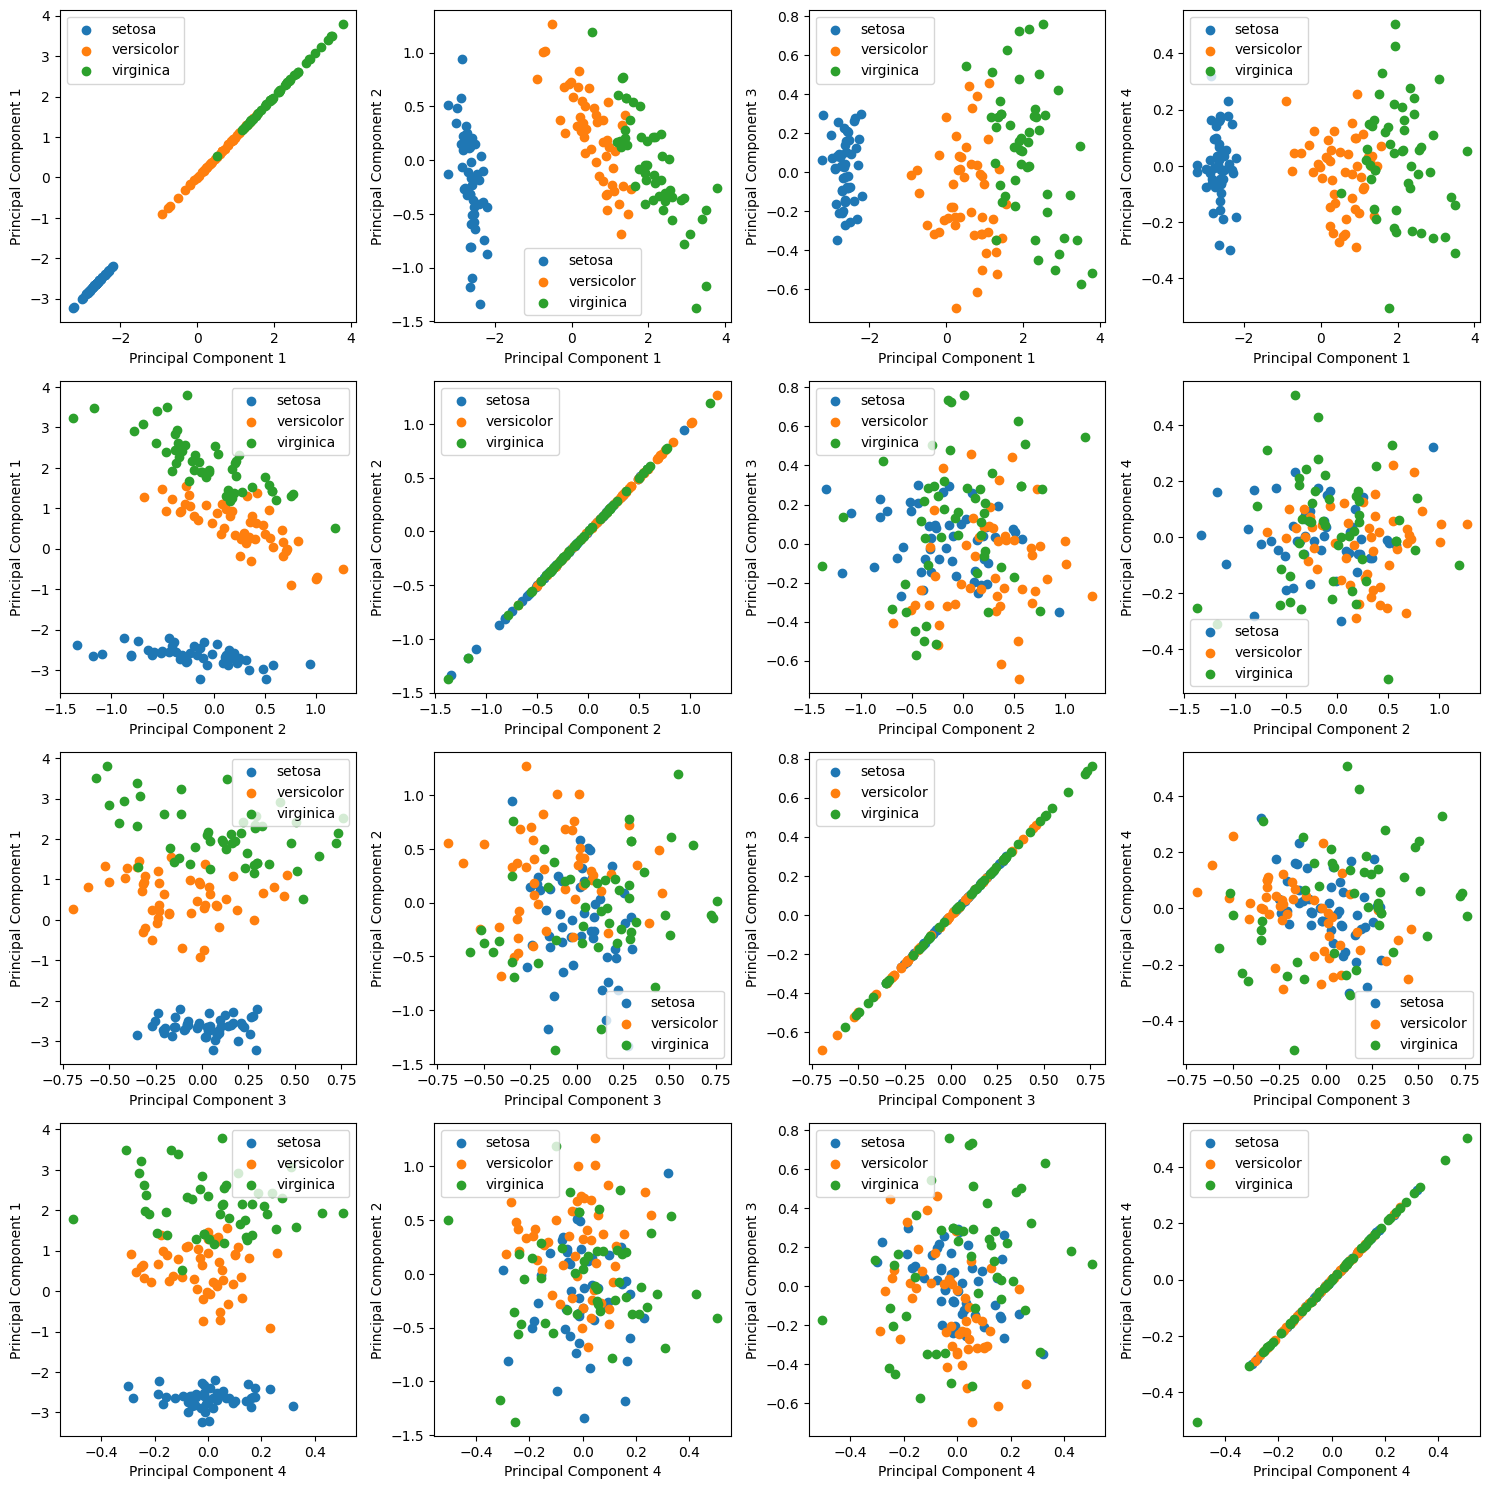

In [ ]:
plot_all_components(X, Y, pcs)

### **Comments**

From the above plots it is obvious that the combination of any two principal components where **only** one of them is the first principal component, results in a fair explanation of the variance in the data & the classes can be separated visualy (especially the combination of the **first & second principal components** -> results in the **most explanation of data variability**, unlike the combination of the third and fourth principal components, which results in almost no explanation).

The above plots make a lot of sense, since the 1st and 2nd principal components have the greatest eigenvalues thus their combination will hold the greatest contribution in the data variability explanation, and thus the ability to seperate effeciently between classes. Moreover, the 3rd & 4th principal components have the smallest eigenvalues among all, and thus they hold the minority of the variability in the data, which explains why in their plots it is very difficult to seperate between the different classes visualy and thus won't help a lot in the Machine Learning model alone.

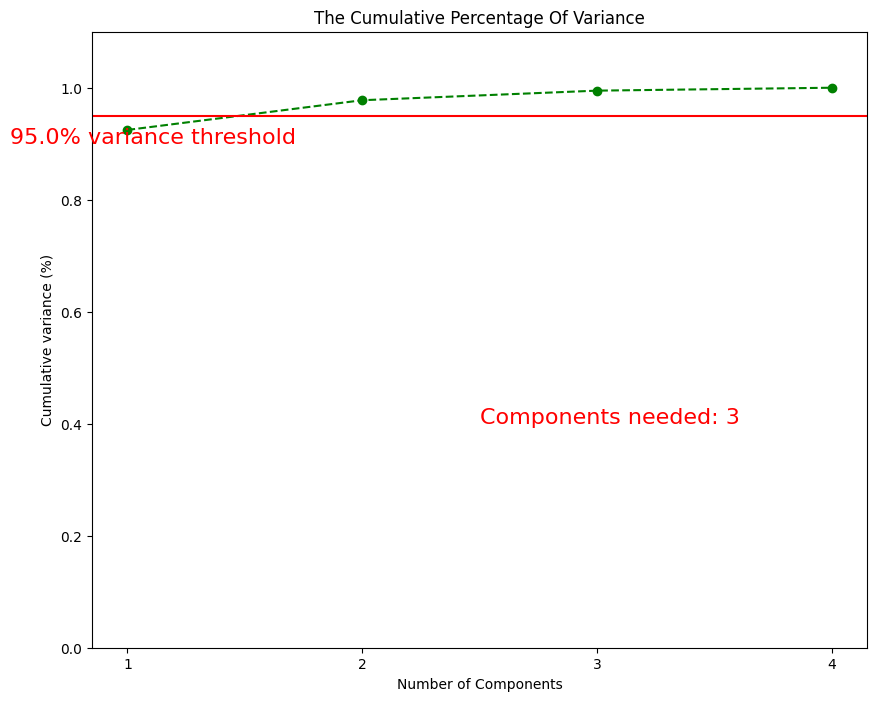

In [ ]:
# Visualize the cumulative percentage of variance
cumulative_percentage_of_variance(sorted_values, 0.95)

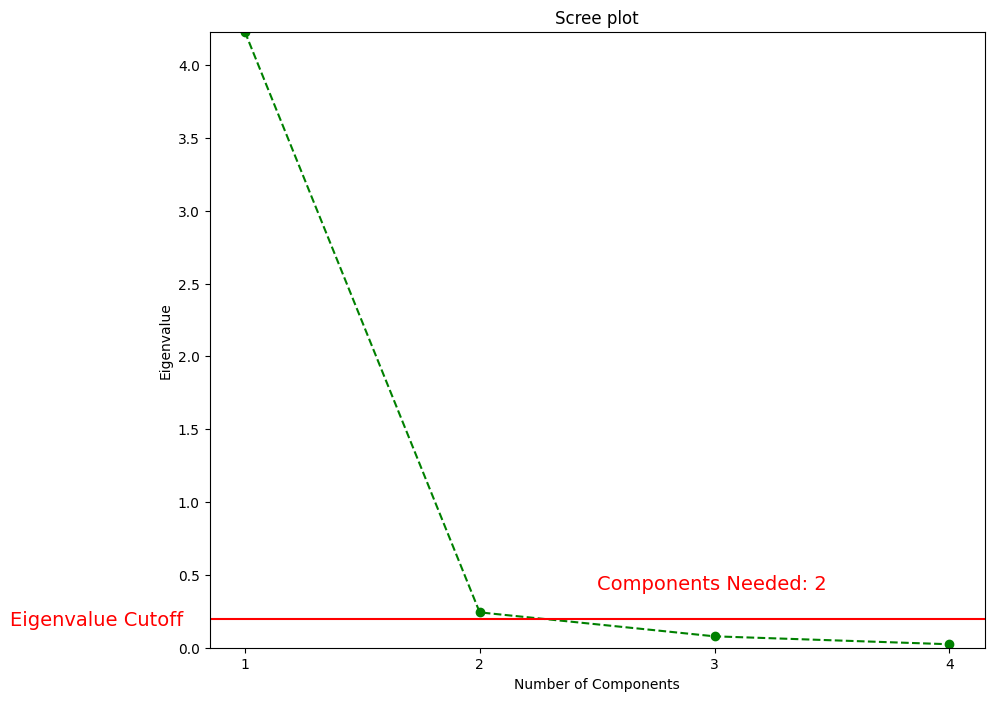

In [ ]:
# Visualize the Scree Plot
scree_plot(sorted_values, 0.2)

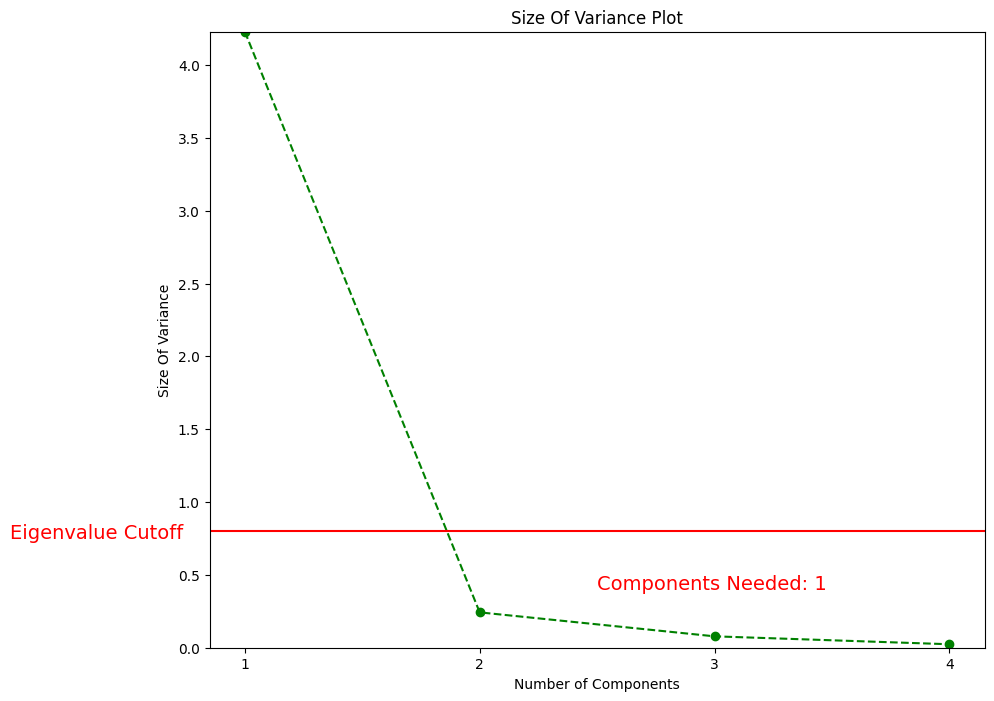

In [ ]:
# Visualize the size of variance
size_of_variance(sorted_values, 0.7)

### **Comments**


**Using:**

**1)  Cumulative Percentage of Variance & a threhold of 95% of the cumulative variance :**  we would choose **3** Principal Components (Corresponding to the largest eigenvalues).

**2)  Scree Plot :** By Looking at the elbow of the plot we can see that choosing only **2** Principal Components would be best.

**3)  Size Of Variance :** By looking for Principal components with eigenvalues greater than or equal to 70% of the mean of eigenvalues we find that we can use only **1** Principal Component.

# **Requirement 3**

In [ ]:
import numpy as np
import random

In [ ]:
# A function that generates normally distributed data
def generate_random_data(n=50, p=3):

  SEED = 42     # Setting a fixed value of the seed for reproducibility
  random_gen = random.Random(x= SEED)     # A random generator object, will be used in generating the normally distributed data

  # Generate the normally distributed features with mean 0f 0 & standard deviation of 1
  x_1 = np.array([random_gen.normalvariate(mu=0, sigma=1) * 100 for sample in range(0, n)]).reshape((n, 1)) # The feature with highest variance
  x_2_3 = np.array([[random_gen.normalvariate(mu=0, sigma=1) for sample in range(0, n)] for feature in range(0, 2)])
  x_2_3 = x_2_3.T
  # Concatenate the features/variables to one 2d array
  x = np.concatenate((x_1, x_2_3), axis=1)

  return x     # Return the data/features/variables

In [ ]:
# A function that performs PCA using the Correlation Matrix
def pca_with_correlation():

  # Get the features
  x = generate_random_data().T

  # Create correlation matrix
  corr_matrix = np.corrcoef(x)
  print('Correlation Matrix: \n', corr_matrix)

  # Get The Eigenvalues & Eigenvectors from the Correlation Matrix
  eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
  print('Eigenvalues: \n', eigenvalues)
  print('Eigenvectors:\n', eigenvectors)

  # Sort the Eigenvalues & Eigenvectors Descindingly
  sorted_eigen_vectors, sorted_eigen_values = sort_eigens(eigenvalues, eigenvectors)
  print('Sorted Eigenvalues: \n', sorted_eigen_values)
  print('Sorted Eigenvectors:\n', sorted_eigen_vectors)

  # Get the new Principal Components
  pcs = np.dot(x.T, sorted_eigen_vectors)
  print(f'New Principal Components with shape {pcs.shape}:\n', pcs)

  return pcs    # Return the Principal Components

In [ ]:
# A function that performs PCA using the Covariance Matrix
def pca_with_covariance():

    # Get the features
    x = generate_random_data().T

    # Create correlation matrix
    cov_matrix = np.cov(x)
    print('Covariance Matrix: \n', cov_matrix)

    # Get The Eigenvalues & Eigenvectors from the Covariance Matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    print('Eigenvalues: \n', eigenvalues)
    print('Eigenvectors:\n', eigenvectors)

    # Sort the Eigenvalues & Eigenvectors Descindingly
    sorted_eigen_vectors, sorted_eigen_values = sort_eigens(eigenvalues, eigenvectors)
    print('Sorted Eigenvalues: \n', sorted_eigen_values)
    print('Sorted Eigenvectors:\n', sorted_eigen_vectors)

    # Get the new Principal Components
    pcs = np.dot(x.T, sorted_eigen_vectors)
    print(f'New Principal Components with shape {pcs.shape}:\n', pcs)

    return pcs      # Return the Principal Components

In [ ]:
# Perform PCA using Correlation Matrix
pcs_corr = pca_with_correlation()

Correlation Matrix: 
 [[ 1.         -0.08654827  0.17445244]
 [-0.08654827  1.         -0.18628395]
 [ 0.17445244 -0.18628395  1.        ]]
Eigenvalues: 
 [1.30207298 0.91369299 0.78423403]
Eigenvectors:
 [[-0.53024503  0.73622602 -0.42048954]
 [ 0.54989217  0.67612263  0.49038433]
 [-0.6453362  -0.02879995  0.76335559]]
Sorted Eigenvalues: 
 [1.30207298 0.91369299 0.78423403]
Sorted Eigenvectors:
 [[-0.53024503  0.73622602 -0.42048954]
 [ 0.54989217  0.67612263  0.49038433]
 [-0.6453362  -0.02879995  0.76335559]]
New Principal Components with shape (50, 3):
 [[ -12.42232172   18.02634272  -11.11632225]
 [  25.95043313  -36.70559235   21.16758225]
 [ -66.59905502   92.5403653   -52.40118504]
 [   7.04503388  -10.66190715    5.28131708]
 [  51.73831886  -71.98603977   40.78591639]
 [ -30.62832766   41.02428422  -23.92772399]
 [  60.94708157  -86.44783009   49.47203267]
 [ -92.40359603  127.56011755  -73.46894128]
 [  15.12576566  -25.28403843   13.83100112]
 [ -64.32617765   86.08830641

In [ ]:
# Perform PCA using Covariance Matrix
pcs_cov = pca_with_covariance()

Covariance Matrix: 
 [[ 1.13882625e+04 -8.25958255e+00  1.85534878e+01]
 [-8.25958255e+00  7.99727290e-01 -1.66022197e-01]
 [ 1.85534878e+01 -1.66022197e-01  9.93206458e-01]]
Eigenvalues: 
 [1.13882987e+04 1.05281727e+00 7.03895796e-01]
Eigenvectors:
 [[ 9.99998410e-01 -1.77203644e-03 -2.01734058e-04]
 [-7.25342756e-04 -5.07424664e-01  8.61695819e-01]
 [ 1.62932123e-03  8.61694302e-01  5.07425142e-01]]
Sorted Eigenvalues: 
 [1.13882987e+04 1.05281727e+00 7.03895796e-01]
Sorted Eigenvectors:
 [[ 9.99998410e-01 -1.77203644e-03 -2.01734058e-04]
 [-7.25342756e-04 -5.07424664e-01  8.61695819e-01]
 [ 1.62932123e-03  8.61694302e-01  5.07425142e-01]]
New Principal Components with shape (50, 3):
 [[ 2.45310532e+01 -8.47283026e-01 -5.87595245e-01]
 [-4.96834832e+01  5.76855872e-01  1.03728517e-01]
 [ 1.25478722e+02 -7.94020999e-02  3.48545869e-01]
 [-1.38056827e+01  2.23345269e-01 -7.44526667e-01]
 [-9.75820138e+01  1.28423597e-01 -2.61965680e-01]
 [ 5.65060594e+01  6.00033351e-01 -5.72305949e-0

### **Comments**

From the above results it is clear that the second approach (using the covariance matrix) caprtured alot more variations in the data than the first approach (using the correlation matrix), this appears clearly in the eigenvalues printed, where the average of eigenvalues from the covariance matrix approach is much larger than that the correlation matrix approach.

Moreover, the first principal component alone from the second approach
 (covariance matrix approach) captures a significant amount of the variations of the data more than the 3 principal components combined together from the first approach (correlation matrix approach).

So in conclusion, if the goal was to capture a significant amount of the variations in the data with the least amount of principal components then the **covariance matrix** approach would be a good one, and choosing the first principal alone would hold a significant amount of variation **(very informative)**. However, if the goal was to choose principal components where there isn't a huge gap between the captured amount of variations by each component, then the first approach (correlation matrix approach) would be suitable in that case (the variations captured by each component isn't the greatest, however they are close in values/variations captured).

